# Running a grid of models

Here is a notebook for running a grid of DYNAMITE models.

## Section 1

In [1]:
import sys
sys.path.insert(0,'../../')
import dynamite as dyn

In [2]:
fname = 'NGC6278_config.yaml'
c = dyn.config_reader.Configuration(fname, silent=True)
tmp = '/Users/pjethwa/Astro/Science/dynamite/triaxschwarz/triaxschwarzschild'
c.settings.legacy_settings['directory'] = tmp

parspace = dyn.parameter_space.ParameterSpace(c.system)
all_models = dyn.model.AllModels(parspace=parspace, settings=c.settings)
kw_executor = {'system':c.system,
               'legacy_directory':c.settings.legacy_settings['directory'],
               'executor_settings':c.settings.executor_settings}
executor_type = c.settings.executor_settings['type']
executor = getattr(dyn.executor, executor_type)(**kw_executor)

NGC6278_output/all_models.ecsv
making empty table attribute
I love Slurm!
I love Slurm even more!!


In [3]:
# "run" the models
smi = dyn.model_iterator.ModelIterator(
    system=c.system,
    all_models=all_models,
    settings=c.settings,
    executor=executor)

LegacyGridSearch: "iteration 0"
LegacyGridSearch added 1 new model(s) out of 1
... running model 1 out of 1
Fit the orbit library to the kinematic data.
NNLS is finished.
LegacyGridSearch: "iteration 1"
LegacyGridSearch added 4 new model(s) out of 4
... running model 1 out of 4
Fit the orbit library to the kinematic data.
NNLS is finished.
... running model 2 out of 4
Fit the orbit library to the kinematic data.
NNLS is finished.
... running model 3 out of 4
Fit the orbit library to the kinematic data.
NNLS is finished.
... running model 4 out of 4
Fit the orbit library to the kinematic data.
NNLS is finished.
LegacyGridSearch: "iteration 2"
LegacyGridSearch added 2 new model(s) out of 2
... running model 1 out of 2
Fit the orbit library to the kinematic data.
NNLS is finished.
... running model 2 out of 2
Fit the orbit library to the kinematic data.
NNLS is finished.
LegacyGridSearch: "iteration 3"
LegacyGridSearch added 3 new model(s) out of 3
... running model 1 out of 3
Fit the orb

If you have previously run the notebook ``running_a_model.ipynb`` then you may notice that 'model 1 out of 1' runs instantly. This is because the model has been run previously and the outputs have been saved, hence we can immediately read the output.

After the grid of models has been run, the outputs are stored in ``all_models.table`` which is an ``Astropy`` table object,

In [26]:
all_models.table

mass,a,dc,f,q,p,u,ml,chi2,kinchi2,time_modified,orblib_done,weights_done,all_done,which_iter
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,datetime64[ms],bool,bool,bool,int64
100000.0,0.001,1000.0,10.0,0.54,0.99,0.9999,5.0,3698.687185,4122039.5353705524,2020-10-06T09:25:26.000,True,True,True,0
100000.0,0.001,1000.0,3.1622776601683795,0.54,0.99,0.9999,5.0,5899.459565,1591901.2234776202,2020-10-06T09:25:26.000,True,True,True,1
100000.0,0.001,1000.0,31.622776601683793,0.54,0.99,0.9999,5.0,5938.043959,6374943.12987605,2020-10-06T09:25:26.000,True,True,True,1
100000.0,0.001,1000.0,10.0,0.54,0.99,0.9999,4.0,3040.11639,3095463.0381058846,2020-10-06T09:25:27.000,True,True,True,1
100000.0,0.001,1000.0,10.0,0.54,0.99,0.9999,6.0,4196.9205919999995,5180885.681812385,2020-10-06T09:25:27.000,True,True,True,1
100000.0,0.001,1000.0,3.1622776601683795,0.54,0.99,0.9999,4.0,5310.966293999999,1139972.3166882512,2020-10-06T09:25:27.000,True,True,True,2
100000.0,0.001,1000.0,31.622776601683793,0.54,0.99,0.9999,4.0,5828.974666,4524051.6596517945,2020-10-06T09:25:28.000,True,True,True,2
100000.0,0.001,1000.0,5.623413251903491,0.54,0.99,0.9999,4.0,3515.3490609999994,1903985.5351768227,2020-10-06T09:25:28.000,True,True,True,3
100000.0,0.001,1000.0,17.78279410038923,0.54,0.99,0.9999,4.0,6071.567852,4405553.901934262,2020-10-06T09:25:28.000,True,True,True,3


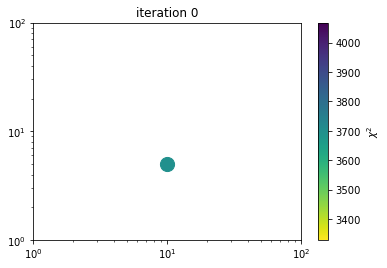

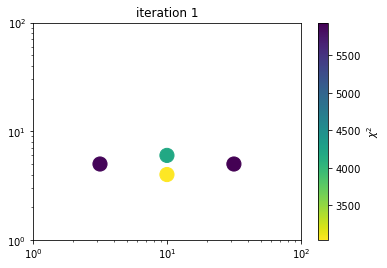

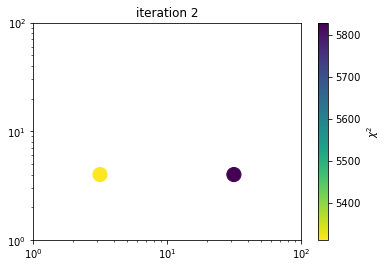

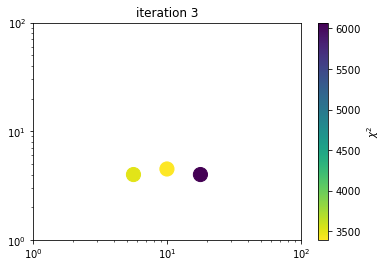

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# extract the lo/hi limits for the two free parameters f and ml

f = parspace.get_parameter_from_name('f')
f_lims_raw = [f.par_generator_settings['lo'], f.par_generator_settings['hi']]
f_lims = [f.get_par_value_from_raw_value(lim0) for lim0 in f_lims_raw]

ml = parspace.get_parameter_from_name('ml')
ml_lims_raw = [ml.par_generator_settings['lo'], ml.par_generator_settings['hi']]
ml_lims = [ml.get_par_value_from_raw_value(lim0) for lim0 in ml_lims_raw]

# get list of iterations
iterations = np.unique(all_models.table['which_iter'])

# plot chi2 of models vs iterations
for iter0 in iterations:
    table = all_models.table
    table = table[table['which_iter']==iter0]
    plt.scatter(table['f'],
                table['ml'],
                c=table['chi2'],
                cmap=plt.cm.viridis_r,
                s=200)
    cbar = plt.colorbar()
    cbar.set_label('$\chi^2$')
    plt.gca().set_title(f'iteration {iter0}')
    plt.gca().set_xlim(*f_lims)
    plt.gca().set_ylim(*ml_lims)
    plt.gca().set_xscale('log')
    plt.gca().set_yscale('log')
    plt.show()

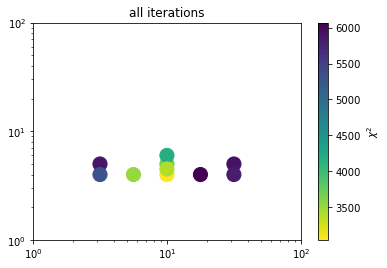

In [25]:
# plot the models: f vs ml altogether
plt.scatter(all_models.table['f'],
            all_models.table['ml'],
            c=all_models.table['chi2'],
            cmap=plt.cm.viridis_r,
            s=200)
cbar = plt.colorbar()
cbar.set_label('$\chi^2$')
plt.gca().set_title(f'all iterations')
plt.gca().set_xlim(*f_lims)
plt.gca().set_ylim(*ml_lims)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.show()